## IMAGE BINARIZATION FOR HANDWRITING OCR

v3 - EDA - Ross Kimberlin - 6/2/2022

In [43]:
import cv2
import imageio as imi
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from PIL import Image
from scipy import misc, ndimage
from sklearn.metrics import accuracy_score, \
    classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

%matplotlib inline

#### TESTING imageio vs PIL vs scipy vs numpy vs OpenCV -

SEE THE FOLLOWING ARTICLES:

https://codeguru.academy/?p=364

https://note.nkmk.me/en/python-numpy-opencv-image-binarization/

https://msameeruddin.hashnode.dev/binarization-of-image-using-numpy

## STEP 1) READ IMAGES INTO PYTHON AND INSPECT

### H-DIBCO DATA SET

#### TRYING imageio -

SEE https://www.geeksforgeeks.org/image-processing-with-scipy-and-numpy-in-python/

In [2]:
read_dir_DIBCO = '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/'

In [3]:
DIBCO_test_img_10 = imi.imread(read_dir_DIBCO + '10.bmp')

### cBAD DATA SET

In [4]:
read_dir_cBAD = '../data/READ-ICDAR2019-cBAD-dataset/eval/'

In [5]:
cBAD_test_img_1708 = imi.imread(read_dir_cBAD + 'cPAS-1708.jpg')

### BENTHAM DATA SET

In [6]:
read_dir_Bentham = '../data/Bentham/BenthamDatasetR0-Images/Images/Pages/'

In [7]:
Ben_test_img_003 = imi.imread(read_dir_Bentham + '115_085_003.jpg')

### READ_ABP_TABLE DATA SET

In [8]:
read_dir_ABPT = '../data/READ_ABP_TABLE/dataset150/img/'

In [9]:
ABPT_test_img_64 = imi.imread(read_dir_ABPT + 'S_Aldersbach_008-01_0064.jpg')

## STEP 1a) TO DO - PLAY WITH IMAGE PRE-PROCESSING

#### scipy ndimage MEDIAN-FILTER DE-NOISING SEEMS TO LOOK THE BEST

<class 'numpy.ndarray'>


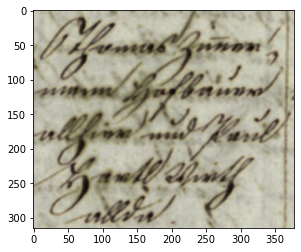

In [10]:
DIBCO_10_dnm = ndimage.median_filter(DIBCO_test_img_10, 4)
 
print(type(DIBCO_10_dnm))    
plt.imshow(DIBCO_10_dnm)
plt.show()

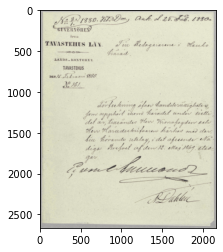

In [11]:
cBAD_1708_dnm = ndimage.median_filter(cBAD_test_img_1708, 4)
 
plt.imshow(cBAD_1708_dnm)
plt.show()

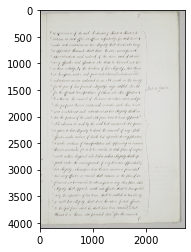

In [12]:
Ben_003_dnm = ndimage.median_filter(Ben_test_img_003, 4)
 
plt.imshow(Ben_003_dnm)
plt.show()

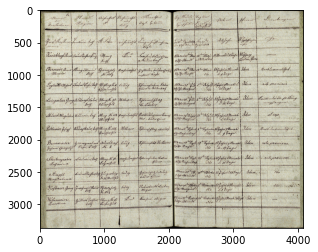

In [13]:
ABPT_64_dnm = ndimage.median_filter(ABPT_test_img_64, 4)
 
plt.imshow(ABPT_64_dnm)
plt.show()

#### EDGE DETECTION

(GETS AN UNSUPPORTED DType ERROR FOR .bmp AND .jpg BOTH)

In [15]:
# x = ndimage.sobel(CTI_1708_denoised_m, axis=0, mode='constant')
# y = ndimage.sobel(CTI_1708_denoised_m, axis=1, mode='constant')
# Sob = np.hypot(x, y)
 
# plt.imshow(Sob)

## STEP 2) TO DO - BINARIZE BLACK & WHITE

(PREFERRED OVER GRAYSCALE, BUT REQUIRES A GRAYSCALE IMAGE FIRST AS INPUT)

#### SEE https://stackoverflow.com/questions/34288776/binarization-of-image-in-opencv

Try out the following:

1.De-noise your image,first, by using either a Median,Bilateral,Gaussian or Adaptive Smooth Filter (Gaussian filter works pretty well when it comes to images with textual content).

2.De-blur the image by referring to http://www.pyimagesearch.com/2015/09/07/blur-detection-with-opencv/ or https://github.com/tvganesh/deconv

3.Check out Adaptive Gaussian thresholding,instead.In case its a scene text image,you can use Otsu's algorithm after shadow removal. The 'Image Processing in OpenCV' tutorials have a detailed documentation on Image Thresholding.

The Image Filtering — OpenCV 3.0.0-dev documentation explains the implementation of the Median Blur, applied to an image.

#### SEE ALSO https://stackoverflow.com/questions/31289895/threshold-image-using-opencv-java/31290735#31290735

adaptiveThreshold is the right choice here. Just need a litte tuning. With these parameters (it's C++, but you can easily translate to Java)

Mat1b gray= imread("path_to_image", IMREAD_GRAYSCALE);
Mat1b result;
adaptiveThreshold(gray, result, 255, ADAPTIVE_THRESH_MEAN_C, THRESH_BINARY, 15, 40);

### TRYING OpenCV's ADAPTIVE THRESHOLDING FROM THEIR DOCUMENTS-

SEE https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html

#### (NEED GRAYSCALE IMAGE FIRST)

#### Simple Thresholding

Here, the matter is straight-forward. For every pixel, the same threshold value is applied. If the pixel value is smaller than the threshold, it is set to 0, otherwise it is set to a maximum value. The function cv.threshold is used to apply the thresholding. The first argument is the source image, which should be a grayscale image. The second argument is the threshold value which is used to classify the pixel values. The third argument is the maximum value which is assigned to pixel values exceeding the threshold. OpenCV provides different types of thresholding which is given by the fourth parameter of the function. Basic thresholding as described above is done by using the type cv.THRESH_BINARY. All simple thresholding types are:

cv.THRESH_BINARY
cv.THRESH_BINARY_INV
cv.THRESH_TRUNC
cv.THRESH_TOZERO
cv.THRESH_TOZERO_INV

See the documentation of the types for the differences.

The method returns two outputs. The first is the threshold that was used and the second output is the thresholded image.

This code compares the different simple thresholding types:

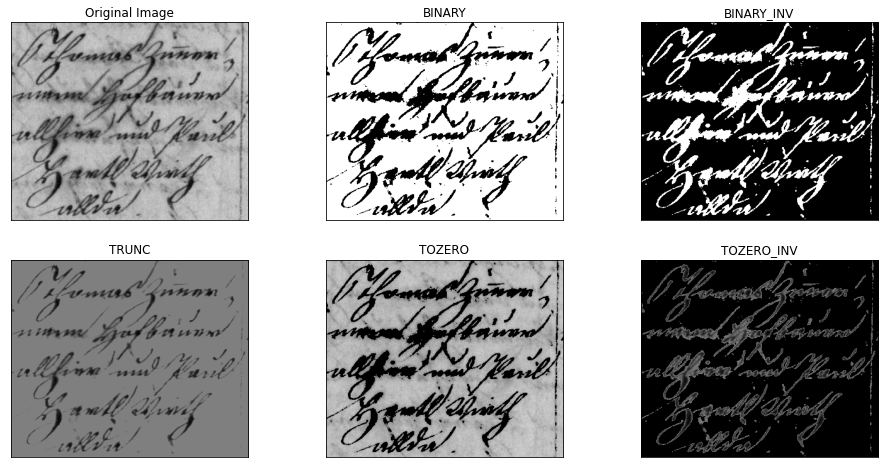

In [14]:
plt.figure(figsize = (16, 8))

ocv_img_test_1 = cv2.imread('../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/10.bmp', 
                            0)

ret,thresh1 = cv2.threshold(ocv_img_test_1,
                            127, 255, 
                            cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(ocv_img_test_1,
                            127, 255, 
                            cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(ocv_img_test_1,
                            127, 255, 
                            cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(ocv_img_test_1,
                            127, 255, 
                            cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(ocv_img_test_1,
                            127, 255, 
                            cv2.THRESH_TOZERO_INV)
                           
titles = ['Original Image', 'BINARY', 'BINARY_INV',
          'TRUNC', 'TOZERO', 'TOZERO_INV']

images = [ocv_img_test_1, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1), plt.imshow(images[i],
                                     'gray',
                                     vmin=0,
                                     vmax=255)
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show();

#### DE-NOISING AFTER BINARIZING LOOKS THE BEST AND IS EASIER

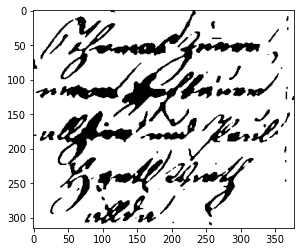

In [20]:
DTI_10_bin = plt.imshow(ndimage.median_filter(thresh1, 4),
                        'gray',
                        vmin=0,
                        vmax=255)
DTI_10_bin

#### CAN WE SAVE THE IMAGE ABOVE?

#### Might not need to save--can just keep process going with variables and save image info arrays into data frames.

#### WHAT DOES np.uint8(DTI_10_bin_keep) DO?

In [24]:
type(DTI_10_bin)

matplotlib.image.AxesImage

In [44]:
# Image.fromarray(np.uint8(DTI_10_bin)) \

# Image.save('../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/output_v1/DTI_10_bin.png')

In [45]:
# cv2.imwrite('../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/output_v1/DTI_10_CV.png',
#            DTI_10_bin)

In [ ]:
# plt.imshow('../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/output_v1/DTI_10_bin.png')

In [19]:
type(images)

list

In [46]:
# HAVING ISSUES TRYING TO FILTER AN ENTIRE LIST

# for i in range(6):
#     plt.subplot(2, 3, i+1), 
#     plt.imshow(ndimage.median_filter(images[i], 4),
#                                      'gray',
#                                      vmin=0,
#                                      vmax=255)
#     plt.title(titles[i])
#     plt.xticks([]), plt.yticks([])
# plt.show();

#### Adaptive Thresholding

In the previous section, we used one global value as a threshold. But this might not be good in all cases, e.g. if an image has different lighting conditions in different areas. In that case, adaptive thresholding can help. Here, the algorithm determines the threshold for a pixel based on a small region around it. So we get different thresholds for different regions of the same image which gives better results for images with varying illumination.

In addition to the parameters described above, the method cv.adaptiveThreshold takes three input parameters:

The adaptiveMethod decides how the threshold value is calculated:

cv.ADAPTIVE_THRESH_MEAN_C: The threshold value is the mean of the neighbourhood area minus the constant C.
cv.ADAPTIVE_THRESH_GAUSSIAN_C: The threshold value is a gaussian-weighted sum of the neighbourhood values minus the constant C.
The blockSize determines the size of the neighbourhood area and C is a constant that is subtracted from the mean or weighted sum of the neighbourhood pixels.

The code below compares global thresholding and adaptive thresholding for an image with varying illumination:

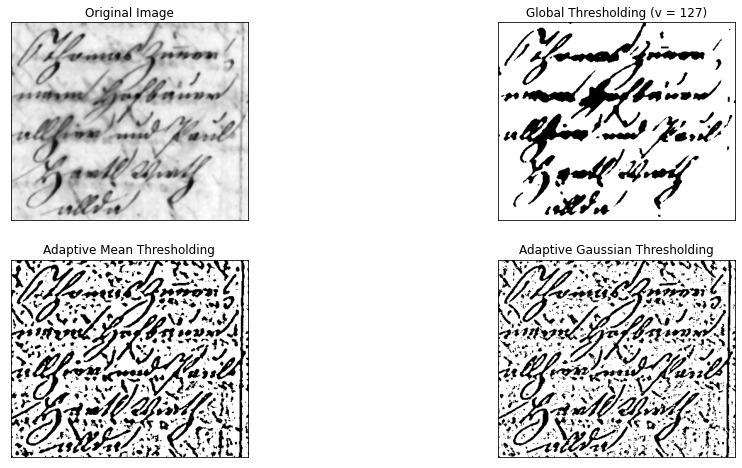

In [16]:
plt.figure(figsize = (16, 8))

DTI_10 = cv2.imread('../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/10.bmp',
                    0)
DTI_10 = cv2.medianBlur(DTI_10,
                        5)

ret,th1 = cv2.threshold(DTI_10,
                        127,255,
                        cv2.THRESH_BINARY)

th2 = cv2.adaptiveThreshold(DTI_10,
                            255,
                            cv2.ADAPTIVE_THRESH_MEAN_C,
                            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(DTI_10,
                            255,
                            cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']

images_adpt = [DTI_10, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images_adpt[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show();

#### GLOBAL THRESHOLDING SEEMS TO LOOK THE BEST HERE

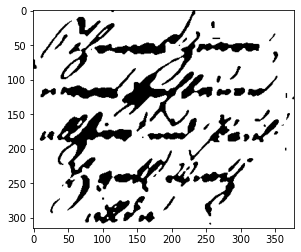

In [17]:
plt.imshow(ndimage.median_filter(th1, 4),
           'gray',
            vmin=0,
            vmax=255)

#### Otsu's Binarization

In global thresholding, we used an arbitrary chosen value as a threshold. In contrast, Otsu's method avoids having to choose a value and determines it automatically.

Consider an image with only two distinct image values (bimodal image), where the histogram would only consist of two peaks. A good threshold would be in the middle of those two values. Similarly, Otsu's method determines an optimal global threshold value from the image histogram.

In order to do so, the cv.threshold() function is used, where cv.THRESH_OTSU is passed as an extra flag. The threshold value can be chosen arbitrary. The algorithm then finds the optimal threshold value which is returned as the first output.

Check out the example below. The input image is a noisy image. In the first case, global thresholding with a value of 127 is applied. In the second case, Otsu's thresholding is applied directly. In the third case, the image is first filtered with a 5x5 gaussian kernel to remove the noise, then Otsu thresholding is applied. See how noise filtering improves the result.

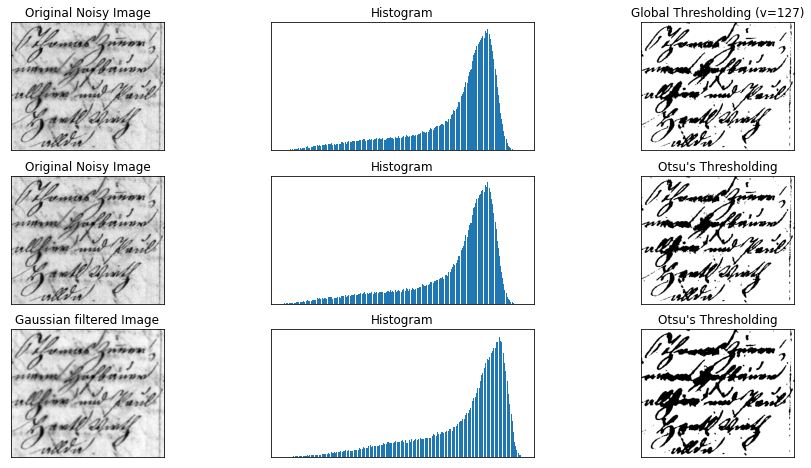

In [18]:
plt.figure(figsize = (16, 8))

DTI_10_otsu = cv2.imread('../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/10.bmp',
                         0)

# global thresholding
ret1,th1 = cv2.threshold(DTI_10_otsu,
                         127,255,
                         cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(DTI_10_otsu,
                         0,255,
                         cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(DTI_10_otsu,
                        (5,5),0)

ret3,th3 = cv2.threshold(blur,
                         0,255,
                         cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [DTI_10_otsu, 0, th1,
          DTI_10_otsu, 0, th2,
          blur, 0, th3]

titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show();

### (TO DO - INCORPORATE GAUSSIAN BLUR?)

#### SEE ALSO https://stackoverflow.com/questions/66457772/binarize-a-set-of-images-in-python

(TRYING WITH ONE IMAGE FIRST)

In [39]:
DIB_10 = '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/10.bmp'

In [40]:
    ### We read the grayscale image with cv2
    im_DIBCO_gray = cv2.imread(DIB_10, 
                               cv2.IMREAD_GRAYSCALE)

    ### We binarize the image
    (thresh, im_bw) = cv2.threshold(im_DIBCO_gray, 
                                    128, 255, 
                                    cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    ### We save the binarized image
      # (GETTING AN ERROR USING THE /output_v1/ FOLDER)
    cv2.imwrite('DIB_10.tiff', 
                im_bw)

True

In [48]:
plt.imshow(np.uint8('DIB_10.tiff'))

# cv2.imshow('DIB_10.tiff')

ValueError: invalid literal for int() with base 10: 'DIB_10.tiff'

In [31]:
# path = r'C:\Users\Antonin\Desktop\WISSEM\IMAGES_20210303\Samplings'
# arr = os.listdir(path)

arr_DIBCO = os.listdir(read_dir_DIBCO)

for file in arr_DIBCO:
    
    filename = file.split('.')[0]

    ### We read the grayscale image with cv2
    im_DIBCO_gray = cv2.imread(file, 
                               cv2.IMREAD_GRAYSCALE)

    ### We binarize the image
    (thresh, im_bw) = cv2.threshold(im_DIBCO_gray, 
                                    128, 255, 
                                    cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    ### We save the binarized image
      # (GETTING AN ERROR USING THE /output_v1/ FOLDER)
    cv2.imwrite(f'{filename}.tiff', 
                im_bw)

error: OpenCV(4.5.5) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp:801: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'


In [32]:
arr_DIBCO

['.DS_Store',
 '3.bmp',
 '2.bmp',
 '1.bmp',
 'output_v1',
 '5.bmp',
 '4.bmp',
 '6.bmp',
 '7.bmp',
 '9.bmp',
 '8.bmp',
 '10.bmp']

In [37]:
type(arr_DIBCO)

list

TypeError: Image data of dtype <U9 cannot be converted to float

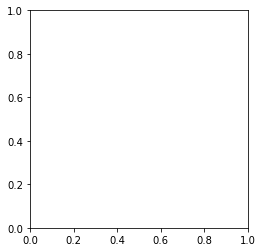

In [36]:
plt.imshow(arr_DIBCO[0])

"As a small addition, os.listdir gives you just the filenames. In the opencv read function it's necessary to concatenate to the folder path with os.path.join."

## TO DO - ASSESS VARIATIONS IN PRE-PROCESSING NEEDS

DO ALL DATA SETS NEED THE SAME PRE-PROCESSING STEPS?

e.g. DOES H-DIBCO NEED MORE DE-NOISING THAN THE OTHERS, etc?

#### A. cBAD AND BENTHAM WILL PROBABLY NEED THE LEAST DE-NOISING;

#### H-DIBCO AND ABP_READ WILL NEED THE MOST.

## STEP 3) TO DO - TRY KERAS MACHINE-LEARNING MODEL

#### (SEE 5/14 KERAS NOTEBOOKS FROM CLASS)

In [ ]:
docs_test = (...)

In [ ]:
docs_test.keys()

In [ ]:
X = 
y = 

In [ ]:
# TO DO - DEFINE X AND y, 
#                num_classes,
#                input_shape

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state = 321)

NameError: name 'X' is not defined

In [ ]:
ker_test = tf.keras.Sequential([
    tf.keras.Input(shape = input_shape),
    tf.keras.layers.Conv2D(32, 
                           kernel_size = (3, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_classes,
                          activation = 'softmax')
])

In [ ]:
ker_test.summary()

In [ ]:
ker_test.compile('rmsprop',
                 'sparse_categorical_crossentropy')

In [ ]:
ker_test.fit(X_train, y_train,
             batch_size = 512,
             epochs = 25)

## STEP 4) PREDICTIONS AND ACCURACY METRICS

In [ ]:
y_pred = np.argmax(ker_test.predict(X_test),
                   axis = 1)

In [ ]:
print(classification_report(y_test, 
                            y_pred))

## THEN STEP 5) FINISH TWEAKING PRE-PROCESSING & RE-ITERATE

#### (e.g. USE GAUSSIAN BLUR?  WHICH DE-NOISING, AND AFTER vs BEFORE, IMAGE SEGMENTATION, etc.)